In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv



In [2]:
# Take in WHO measles data and read it into pandas dataFrame
who_measles = "../Resources/02_WHO_measlescasesbycountrybymonth.csv"
who_measles_df = pd.read_csv(who_measles)

#Display DataFrame head
who_measles_df.head()

,Region,ISO3,Country,Year,January,February,March,April,May,June,July,August,September,October,November,December,Unnamed: 16
0,AFR,AGO,Angola,2011,17.0,19.0,37.0,41.0,11.0,8.0,5.0,4.0,32.0,10.0,8.0,0.0,NaN
1,AFR,AGO,Angola,2012,373.0,289.0,381.0,393.0,546.0,357.0,382.0,553.0,571.0,367.0,216.0,42.0,NaN
2,AFR,AGO,Angola,2013,725.0,646.0,734.0,491.0,726.0,695.0,680.0,660.0,563.0,288.0,265.0,91.0,NaN
3,AFR,AGO,Angola,2014,1161.0,1101.0,1319.0,1094.0,1754.0,1150.0,1484.0,1429.0,1098.0,373.0,27.0,12.0,NaN
4,AFR,AGO,Angola,2015,4.0,15.0,0.0,0.0,3.0,3.0,4.0,13.0,40.0,14.0,5.0,2.0,NaN


In [3]:
# Clean data by deleting unnecesary columns in new DataFrame
who_cleaned_measles_df = who_measles_df.drop(who_measles_df.columns[[0, 1]], axis=1)
who_cleaned_measles_df.drop('Unnamed: 16', axis=1, inplace=True)

# Remove the data for the United States of America
who_cleaned_measles_df.drop(who_cleaned_measles_df.loc[who_cleaned_measles_df['Country']=='United States of America'].index, inplace=True)
world_measles_df = who_cleaned_measles_df

# Confirm that the total countries reduced to 193
len(world_measles_df["Country"].value_counts())

# # Display DataFrame head
# world_measles_df.head()

193

In [4]:
# Replace all NaN values with 0 
world_measles_df = world_measles_df.fillna(0)

# Create a new column called "Total" and add up each month's recorded cases to get the total for the year per country
world_measles_df["Total"] = who_cleaned_measles_df["January"] + who_cleaned_measles_df["February"] + who_cleaned_measles_df["March"] + who_cleaned_measles_df["April"] + who_cleaned_measles_df["May"] + who_cleaned_measles_df["June"] + who_cleaned_measles_df["July"] + who_cleaned_measles_df["August"] + who_cleaned_measles_df["September"] + who_cleaned_measles_df["October"] + who_cleaned_measles_df["November"] + who_cleaned_measles_df["December"]

# # Display the DataFrame head with the new column added
# world_measles_df.head()

In [5]:
# Obtain the total number of cases for each of the Years listed
world_total_cases = world_measles_df.groupby('Year').sum()

# # Display the DataFrame head
# world_total_cases.head()

In [6]:
# Reference the relevant columns and drop the others from within the DataFrame
total_cases_df = world_total_cases.drop(world_total_cases.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], axis=1)

# Display the DataFrame head
total_cases_df.head()

,Total
Year,
2011,153533.0
2012,115472.0
2013,179357.0
2014,292257.0
2015,251150.0


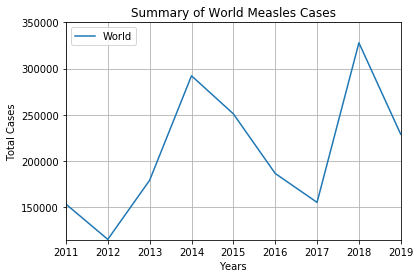

In [7]:
# Line graph with the total cases as the y axis; the years as the x axis
# Define the x axis:
who_x_axis = np.arange(2011, 2020, 1)
cases = [153533, 115472, 179357, 292257, 251150, 186709, 155450, 327926, 229023]

# Plot the line graph that will be used to track measles cases over the years (from 2011 to 2019)
plt.plot(who_x_axis, cases, label="World")

# Create a legend for the chart
plt.legend()

# Add in a grid for the chart
plt.grid()

# Print the chart to the screen (display it)
#plt.show()

# Add Title: Add labels to X and Y axes 
plt.title("Summary of World Measles Cases")
plt.xlabel("Years")
plt.ylabel("Total Cases")

# Set the limits for the X and Y axes
plt.xlim(2011,2019)
plt.ylim(115000,350000)

# Save the plot
plt.savefig('../Output/WHO_Worldwide_Measles.png')

In [8]:
# Obtain the total cases for each country for the period under consideration
total_by_country = world_measles_df.groupby('Country').sum()

# Clean the data by removing an unnecessary column
total_by_country.drop('Year', axis=1, inplace=True)

# # Display the DataFrame head
# total_by_country.head()

In [9]:
# Sort through the data to obtain the top five countries for the period under review
top_five_countries = total_by_country.sort_values(["Total"], ascending=False).head()
top_five_countries

,January,February,March,April,May,June,July,August,September,October,November,December,Total
Country,,,,,,,,,,,,,
India,45239.0,49470.0,64044.0,55595.0,35325.0,21027.0,15795.0,16809.0,17123.0,17726.0,20630.0,23428.0,364809.0
China,10202.0,16772.0,27505.0,33149.0,29479.0,19481.0,13209.0,8512.0,4342.0,3388.0,3744.0,6189.0,174936.0
Nigeria,21572.0,31794.0,40304.0,24242.0,11894.0,5802.0,3916.0,3924.0,3383.0,3423.0,3546.0,2629.0,135905.0
Philippines,24571.0,22899.0,17894.0,10811.0,6017.0,4891.0,4836.0,4935.0,4421.0,3938.0,4878.0,4220.0,92562.0
Indonesia,12294.0,10566.0,9905.0,9922.0,8536.0,7108.0,5929.0,5015.0,5518.0,6068.0,5388.0,4292.0,90078.0


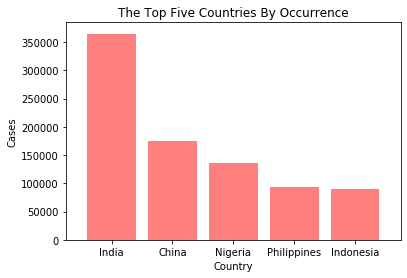

In [10]:
# Create a list that contains the top five countries with measles cases
countries_x_axis = ["India", "China", "Nigeria", "Philippines", "Indonesia"]
cases = [364809, 174936, 135905, 92562, 90078]

# Create a bar chart based upon the above data
plt.bar(countries_x_axis, cases, color='r', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(countries_x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(cases)+20000)

# Give the chart some labels and a title
plt.title("The Top Five Countries By Occurrence")
plt.xlabel("Country")
plt.ylabel("Cases")

# Save an image of the chart in the output folder
plt.savefig('../Output/Top_Five_Countries.png')

In [11]:
# Sort the data frame in descending order to obtain the countries with the highest cases for each year 
top_countries_yearly = world_measles_df.sort_values(["Total"], ascending=False).head()
top_countries_yearly.head()

,Country,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
1435,India,2015,11329.0,11331.0,11194.0,11214.0,7906.0,5416.0,5069.0,4563.0,4248.0,3133.0,3058.0,4565.0,83026.0
1434,India,2014,7268.0,7127.0,9345.0,11462.0,5908.0,3982.0,3613.0,3403.0,5464.0,6644.0,7547.0,8543.0,80306.0
1436,India,2016,9939.0,11584.0,14796.0,8926.0,5891.0,3754.0,1687.0,2536.0,2172.0,2711.0,3700.0,3102.0,70798.0
1438,India,2018,7619.0,7927.0,13114.0,11077.0,9933.0,4498.0,2791.0,3053.0,2274.0,2593.0,1930.0,2582.0,69391.0
1437,India,2017,5532.0,7023.0,10762.0,8377.0,5687.0,3377.0,2635.0,3254.0,2965.0,2645.0,4395.0,4636.0,61288.0


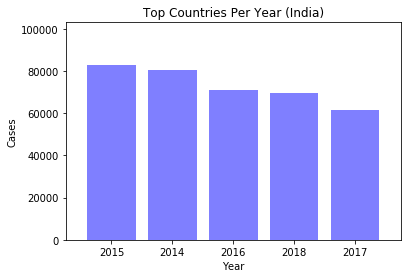

In [12]:
# Create a list that contains the top five countries with measles cases
year_x_axis = ["2015", "2014", "2016", "2018", "2017"]
cases = [83026, 80306, 70798, 69391, 61288]

# Create a bar chart based upon the above data
plt.bar(year_x_axis, cases, color='b', alpha=0.5, align="center")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(year_x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(cases)+20000)

# Give the bar chart labels and a title
plt.title("Top Countries Per Year (India)")
plt.xlabel("Year")
plt.ylabel("Cases")

# Save an image of the chart in the output folder
plt.savefig('../Output/Highest_Occurence_India.png')

In [13]:
# Out of curiosity sort through the data to determine bottom five countries
# Sort through the data to obtain the bottom five countries for the period under review
bottom_five_countries = total_by_country.sort_values(["Total"]).head()
bottom_five_countries

,January,February,March,April,May,June,July,August,September,October,November,December,Total
Country,,,,,,,,,,,,,
Nicaragua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sao Tome and Principe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dominica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grenada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
import gmaps
import pandas as pd

# Configure gmaps
from config import gkey

gmaps.configure(api_key=gkey)

# Convert a single dictionary containing lists into a dataframe
top_five_df = pd.DataFrame(
   {"Country": ["India", "China", "Nigeria", "Philippines", "Indonesia"],
    "Lat": [23.406012, 35.486703, 9.59396, 11.112666, -1.2480891],
    "Lng": [79.45809, 101.901875, 8.105306, 122.509476, 115.419],
    "Total": [364809, 174936, 135905, 92562, 90078]

    }
)
top_five_df

# Store latitude and longitude in locations
locations = top_five_df[["Lat", "Lng"]]
# locations

# Plot Heatmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=cases, dissipating=False, max_intensity=5000, point_radius=5)
fig.add_layer(heat_layer)

# plt.save_fig('../Output/World_HeatMap2.png')
fig

Figure(layout=FigureLayout(height='420px'))